In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data() #bultin data set which loads in this format

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape #60000 sets of images

(60000, 28, 28)

In [5]:
X_test.shape #3d array

(10000, 28, 28)

In [6]:
y_train #It contains labels of images i.e., 5 no. is present

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

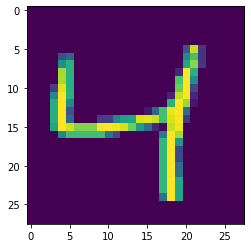

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2]) #converting pixel value to image

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train = X_train/255 
X_test = X_test/255
#Dividing max value to Bring the pixel values from 0 to 1 range #When values are in similiar range 
#the convergence happens fast & weights are also updated in better way

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))#converts high dimensiona to 1D
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()
#In flatten layer, no training occurs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2691 - accuracy: 0.9223 - val_loss: 0.1612 - val_accuracy: 0.9529
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1177 - accuracy: 0.9645 - val_loss: 0.1029 - val_accuracy: 0.9692
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0819 - accuracy: 0.9748 - val_loss: 0.1135 - val_accuracy: 0.9666
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.1000 - val_accuracy: 0.9724
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.1068 - val_accuracy: 0.9697
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0940 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.1020 - val_accuracy:

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
y_prob.argmax(axis=1) #images labels as per dataset 

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.978

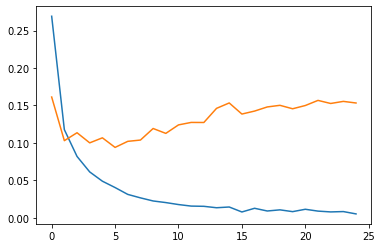

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

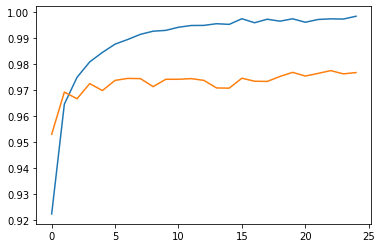

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

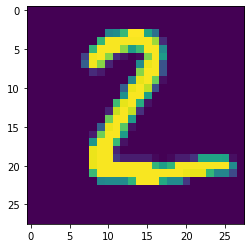

In [21]:
plt.imshow(X_test[1])

In [22]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 14ms/step


array([2])